### only modify the cell directly below this. I think I have the rest of the code set up to output the K_b and N_A at the very end. Just modify the variables below this as needed, then click "restart and run all cells". The K_b and N_A will be printed at the very bottom. I need to modify it to also output uncertainty

In [1]:
micronsPerPixel=.16 # for 40x, use .16, idk about other magnifications
framesPerSecond=5 # for 200ms per frame, use 5
temperatureF=72 # I'm assuming room temperature
tracerDiameter=2*10**-6 # 2 micron diameter
mainUnit=10**-6 # shouldn't need to change this
pathToFile='../022721_S6_2micron_1min.mp4' # you might need to use ./ as opposed to ../

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel
frames = gray(pims.Video(pathToFile))

In [4]:
f = tp.batch(frames, 11, minmass=500);

Frame 300: 40 features


In [5]:
t = tp.link(f, 10, memory=3) # might need to modify the 10, idk what it should be but smaller means quicker computation

Frame 300: 40 trajectories present.


In [6]:
t1 = tp.filter_stubs(t, 20)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 195
After: 104


In [7]:
#plt.figure()
#tp.annotate(t1[t1['frame'] == 0], frames[0]);

In [8]:
#lt.figure()
#tp.plot_traj(t1);

In [9]:
d = tp.compute_drift(t1)

In [10]:
#d.plot()
#plt.show()

In [11]:
tm = tp.subtract_drift(t1.copy(), d)
#ax = tp.plot_traj(tm)
#plt.show()

In [12]:
#im = tp.imsd(tm, micronsPerPixel/1., framesPerSecond)
#fig, ax = plt.subplots()
#ax.plot(im.index, im, 'k-', alpha=0.1)  # black lines, semitransparent
#ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
#       xlabel='lag time $t$')
#ax.set_xscale('log')
#ax.set_yscale('log')

In [13]:
em = tp.emsd(tm, micronsPerPixel/1., 5)
#fig, ax = plt.subplots()
#ax.plot(em.index, em, 'o')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set(ylabel=r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]',
#       xlabel='lag time $t$')
#ax.set(ylim=(1e-2, 10));

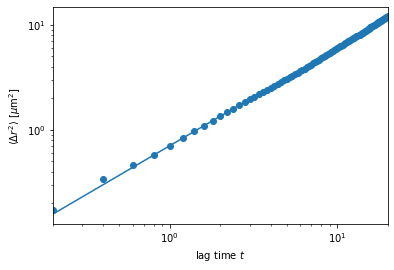

In [14]:
plt.figure()
plt.ylabel(r'$\langle \Delta r^2 \rangle$ [$\mu$m$^2$]')
plt.xlabel('lag time $t$');
A=tp.utils.fit_powerlaw(em).A
#print(A)

In [15]:
# A was .773374 for ../022521a_2micron_1min.mp4
D=A/4*mainUnit**2 # diffusion constant
temperatureK=(temperatureF-32)/1.8+273.15
eta=.0009954 # I'm assuming room temperature, shouldn't make a significant difference
r=tracerDiameter/2
k_b=D/temperatureK*6*np.pi*eta*r
print("K_b: "+str(k_b))
R=8.31446261815324
n_a=R/D/6/np.pi/eta/r*temperatureK
print("N_A: "+str(n_a))

K_b: msd    1.120838e-23
Name: A, dtype: float64
N_A: msd    7.418075e+23
Name: A, dtype: float64
